# Youtube Trending Videos Analysis  
## Dataset from [Kaggle](https://www.kaggle.com/datasets/datasnaek/youtube-new?resource=download)

### Context

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

Note that this dataset is a structurally improved version of [this dataset](https://www.kaggle.com/datasnaek/youtube).
### Content

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day.

# Importation of libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('USvideos.csv')

# First inspection of dataset

In [3]:
df.head(3).T

,0,1,2
video_id,2kyS6SvSYSE,1ZAPwfrtAFY,5qpjK5DgCt4
trending_date,17.14.11,17.14.11,17.14.11
title,WE WANT TO TALK ABOUT OUR MARRIAGE,The Trump Presidency: Last Week Tonight with J...,"Racist Superman | Rudy Mancuso, King Bach & Le..."
channel_title,CaseyNeistat,LastWeekTonight,Rudy Mancuso
category_id,22,24,23
publish_time,2017-11-13T17:13:01.000Z,2017-11-13T07:30:00.000Z,2017-11-12T19:05:24.000Z
tags,SHANtell martin,"last week tonight trump presidency|""last week ...","racist superman|""rudy""|""mancuso""|""king""|""bach""..."
views,748374,2418783,3191434
likes,57527,97185,146033
dislikes,2966,6146,5339


### Dataset shape

In [4]:
df.shape

(40949, 16)

### Check dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### Check missing values

In [6]:
df.isna().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

# Data Cleaning

## Removal of unuseful variables  
I don't think I will use the thumbnail links

In [7]:
keep_vars = [i for i in df.columns if i != 'thumbnail_link']
df = df[keep_vars]


Remove the `video_id` variable:

In [8]:
df = df.loc[:,df.columns[1:] ]

## Convert date variables to datetime dtype

In [9]:
df.trending_date.sample(10).values

array(['18.28.01', '18.22.04', '18.03.06', '18.01.01', '18.23.02',
       '18.07.05', '18.12.06', '18.04.04', '18.04.01', '17.20.11'],
      dtype=object)

In [10]:
df.publish_time.sample(10).values

array(['2018-01-19T16:51:07.000Z', '2018-04-24T15:00:03.000Z',
       '2018-05-29T18:41:24.000Z', '2018-03-16T19:00:16.000Z',
       '2018-02-12T17:00:52.000Z', '2018-03-15T17:00:05.000Z',
       '2018-02-26T11:09:32.000Z', '2017-11-25T15:12:26.000Z',
       '2018-03-16T16:00:14.000Z', '2018-02-05T02:22:18.000Z'],
      dtype=object)

The dates seem to be in the format: YY.DD.MM

In [11]:
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m')

In [12]:
df.publish_time = pd.to_datetime(df.publish_time)

After conversion, let's check dtypes again:

In [13]:
df.dtypes

trending_date                  datetime64[ns]
title                                  object
channel_title                          object
category_id                             int64
publish_time              datetime64[ns, UTC]
tags                                   object
views                                   int64
likes                                   int64
dislikes                                int64
comment_count                           int64
comments_disabled                        bool
ratings_disabled                         bool
video_error_or_removed                   bool
description                            object
dtype: object

## Clean the text variables

In [14]:
df.select_dtypes('object').columns

Index(['title', 'channel_title', 'tags', 'description'], dtype='object')

### Titles

Change titles to a proper case

In [15]:
df.title.sample(10)

33067           Jason Mraz  - Have It All [Official Video]
18634    The Talk - Piers Morgan Goes Off on Omarosa, f...
40350    Town Hall 12 Update is Here! (Clash of Clans O...
22115          Getting Delay, without using any effects...
12830    Remy Ma - Melanin Magic (Pretty Brown) (Audio)...
22518                      Voice Activated Hot Dog Blaster
34878                    WEIRD PRODUCTS | Tati Approved???
20806                  The French Toast Breakfast Sandwich
4522                                         Flinch w/ BTS
21121    The myth of Thor's journey to the land of gian...
Name: title, dtype: object

In [16]:
df.title = df.title.str.capitalize()

### Channel title

In [17]:
df.channel_title.sample(10)

24461                 BrettYoungVEVO
21774                        INSIDER
35737           Marvel Entertainment
7235                        CBS News
34320              Jaiden Animations
328                         ABC News
32023    Sony Pictures Entertainment
19578              Jimmy Kimmel Live
23882               LIVEKellyandRyan
12296                 TroyeSivanVEVO
Name: channel_title, dtype: object

### Categories

In [18]:
df.category_id.unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43])

Translate category id into a string, using this github resource:  [dgp/youtube api video category id list](https://gist.github.com/dgp/1b24bf2961521bd75d6c)

In [19]:
categories = """
2 - Autos & Vehicles
1 -  Film & Animation
10 - Music
15 - Pets & Animals
17 - Sports
18 - Short Movies
19 - Travel & Events
20 - Gaming
21 - Videoblogging
22 - People & Blogs
23 - Comedy
24 - Entertainment
25 - News & Politics
26 - Howto & Style
27 - Education
28 - Science & Technology
29 - Nonprofits & Activism
30 - Movies
31 - Anime/Animation
32 - Action/Adventure
33 - Classics
34 - Comedy
35 - Documentary
36 - Drama
37 - Family
38 - Foreign
39 - Horror
40 - Sci-Fi/Fantasy
41 - Thriller
42 - Shorts
43 - Shows
44 - Trailers"""

In [20]:
categories = categories.split('\n')[1:]
categories[:5]

['2 - Autos & Vehicles',
 '1 -  Film & Animation',
 '10 - Music',
 '15 - Pets & Animals',
 '17 - Sports']

In [21]:
categories = [i.split(' - ')[::1] for i in categories]

In [22]:
pd.Series(categories).sample(3)

12    [25, News & Politics]
4              [17, Sports]
5        [18, Short Movies]
dtype: object

In [23]:
categories = {int(i[0]): i[1] for i in categories}

In [24]:
df['category'] = df.category_id.apply(lambda x : categories[x])

In [25]:
df.category.unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', ' Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

### Tags

In [26]:
df.tags.sample(5)

24698    Tiny House|"Tiny Home"|"Tiny House Australia"|...
27207    cooking a steak with salt|"cooking a steak wit...
30083    PLJic7bfGlo3occ87QSlmV7UfA3W3yYzHW|"PLJic7bfGl...
28344    humor|"cyanide & happiness"|"explosm.net"|"sho...
2664     laser cutter|"william osman"|"crappy science"|...
Name: tags, dtype: object

From a previous run of the `df.tags.sample()` function, I found that some videos have as tag: `[none]`. I will substitute by an empty string.

In [27]:
df.loc[df.tags == '[none]', 'tags'] = None

In [28]:
df.tags = df.tags.apply(lambda x : x.replace('"', '').split('|') if x is not None else x )

Now I will trim the whitespaces for the different tags

In [29]:
df.tags = df.tags.apply(lambda x : [i.strip().lower() for i in x] if x is not None else x)

In [30]:
df.tags.sample(10)

35706    [carli, bybel, google picks my makeup, challen...
7624     [wwe, world wrestling entertainment, wrestling...
3256     [refinery29, refinery 29, r29, r29 video, refi...
13837    [iisuperwomanii, superwoman, team super, comed...
37293    [buzzfeed, worth it, cheap vs. expensive, stev...
5292           [greyson chance, paparazzi, lady gaga, low]
2880     [mousetrap car, thebackyardscientist, mousetra...
34627    [adam dunn, adam dunn strikeouts, adam dunn ho...
3046     [iphone x, iphone x review, iphone, review, ap...
28478    [the nerdwriter, nerdwriter, nerdwriter youtub...
Name: tags, dtype: object

# Export the clean dataset

## Rearrange the columns

In [31]:
new_order = 'title, channel_title, publish_time, trending_date, category_id, category, description, tags, views, likes, dislikes, comment_count, comments_disabled, ratings_disabled, video_error_or_removed'.split(', ')

In [32]:
df = df[new_order]

## Take a sample of clean dataset

In [77]:
df.sample(3).T

,10713,14183,26869
title,Camila cabello - havana ( cover by big marvel ),When you and your mates go snow boarding for t...,Dem beats (ft. rupaul) by todrick hall
channel_title,Big Marvel,Funny News,todrickhall
publish_time,2018-01-01 12:33:16+00:00,2018-01-22 00:08:49+00:00,2018-03-22 22:16:17+00:00
trending_date,2018-01-05 00:00:00+00:00,2018-01-24 00:00:00+00:00,2018-04-07 00:00:00+00:00
category_id,10,22,24
category,Music,People & Blogs,Entertainment
description,thank you for watching this video please like ...,Lol - Subscribe to my new channel that will co...,DOWNLOAD DEM BEATS on iTunes: https://itunes.a...
tags,"[camila cabello, havana, big marvel]",None,"[todrick hall, mtv, american idol, beyonce, fl..."
views,454886,531511,1537417
likes,41484,4626,64534


## Sort the dataset by publish_time

In [34]:
df = df.sort_values('publish_time').reset_index(drop = True)

## Export to csv

In [35]:
df.to_csv('clean_USA_youtube_top_trending_videos.csv', index=False)

In [36]:
df.columns

Index(['title', 'channel_title', 'publish_time', 'trending_date',
       'category_id', 'category', 'description', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed'],
      dtype='object')

# Data Analysis

## 1. What are the top 10 most viewed videos?

In [37]:
df.sort_values('views', ascending=False)[:10][['title', 'channel_title', 'views']].reset_index(drop=True)

,title,channel_title,views
0,Childish gambino - this is america (official v...,ChildishGambinoVEVO,225211923
1,Childish gambino - this is america (official v...,ChildishGambinoVEVO,220490543
2,Childish gambino - this is america (official v...,ChildishGambinoVEVO,217750076
3,Childish gambino - this is america (official v...,ChildishGambinoVEVO,210338856
4,Childish gambino - this is america (official v...,ChildishGambinoVEVO,205643016
5,Childish gambino - this is america (official v...,ChildishGambinoVEVO,200820941
6,Childish gambino - this is america (official v...,ChildishGambinoVEVO,196222618
7,Childish gambino - this is america (official v...,ChildishGambinoVEVO,190950401
8,Childish gambino - this is america (official v...,ChildishGambinoVEVO,184446490
9,Childish gambino - this is america (official v...,ChildishGambinoVEVO,179045286


Although numerically correct, all these videos belong to the same channel and title.  
I want a list of the top 10 most viewed and different videos.

In [38]:
#get the list of videos, sorted from most to least views. Take only title, channel and number of views
videos = df.sort_values('views', ascending=False)[['title', 'channel_title', 'views']].reset_index(drop=True)

# store the first top video
top_ten_videos = videos.iloc[0].to_frame().transpose()

# counter of videos added to top10
top10_count = 1

# counter to traverse the videos dataframe
counter = 1 

# fill in with the next 9 videos of top10
while top10_count < 10:
    
    # check if next video is the same as previous one
    same_video = (videos.iloc[counter].title == top_ten_videos.iloc[top10_count-1].title )
    
    if not same_video:
            # add the next most viewed video
            top_ten_videos = pd.concat( [top_ten_videos,
                                         videos.iloc[counter].to_frame().transpose()
                                        ] , axis=0).reset_index(drop=True)
            top10_count +=1  # increase the count of top10 videos added
    counter += 1  # increase the counter of videos to keep on searching

In [39]:
top_ten_videos

,title,channel_title,views
0,Childish gambino - this is america (official v...,ChildishGambinoVEVO,225211923
1,Youtube rewind: the shape of 2017 | #youtubere...,YouTube Spotlight,149376127
2,Ariana grande - no tears left to cry,ArianaGrandeVevo,148689896
3,Childish gambino - this is america (official v...,ChildishGambinoVEVO,142421830
4,"Becky g, natti natasha - sin pijama (official ...",BeckyGVEVO,139334502
5,Youtube rewind: the shape of 2017 | #youtubere...,YouTube Spotlight,137843120
6,Childish gambino - this is america (official v...,ChildishGambinoVEVO,134839555
7,Youtube rewind: the shape of 2017 | #youtubere...,YouTube Spotlight,125432237
8,Bts (방탄소년단) 'fake love' official mv,ibighit,123010920
9,Ariana grande - no tears left to cry,ArianaGrandeVevo,122581156


## 2. Is there a correlation between the number of likes and views?

In [40]:
data = df[['views', 'likes']] 

### Linear regression  
Followed [this tutorial at realpython.com](https://realpython.com/linear-regression-in-python/#simple-linear-regression)

In [41]:
# if not installed, uncomment and run this command to install library
#!pip install scikit-learn

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary.
# That’s exactly what the argument (-1, 1) of .reshape() specifies.
x = np.array(data.views * 1E-6).reshape((-1, 1))
y = np.array(data.likes * 1E-6)
model = LinearRegression().fit(x, y)

Once the linear regression is done, I want to have the intercept (`.intercept_`) and slope (`.coef_`) values, as well as the determination coefficient 𝑅² (`.score()`).

In [44]:
intercept = model.intercept_
slope = model.coef_[0]
det_coef = model.score(x,y)

Results of the linear regresssion:

In [45]:
print(f'Linear regression: y = {slope.round(3)} · x + {intercept.round(3)}')
print(f'Determination coefficient (for goodness of linear regression) is: {det_coef.round(3)}')

Linear regression: y = 0.026 · x + 0.012
Determination coefficient (for goodness of linear regression) is: 0.721


In [46]:
estimated_likes = np.array(data.views) * slope + intercept

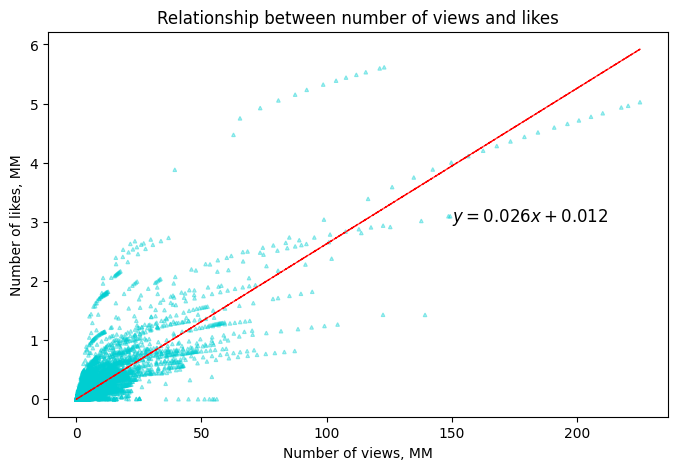

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(data.views * 1E-6, data.likes * 1E-6, s=5, alpha=0.5, edgecolor='darkturquoise', facecolor='none', marker='^')
ax.plot(data.views * 1E-6, estimated_likes * 1E-6, lw=1, ls='dashdot', color='red')
ax.set_xlabel('Number of views, MM')
ax.set_ylabel('Number of likes, MM')
ax.set_title('Relationship between number of views and likes')
# add linear model equation to plot
plt.text(150, 3, f'$y = {slope.round(3)}x + {intercept.round(3)}$', fontsize=12)
plt.show()

## 3. How does the distribution of views vary across different categories?

In [48]:
data =df.groupby('category').views.count().sort_values(ascending = False)

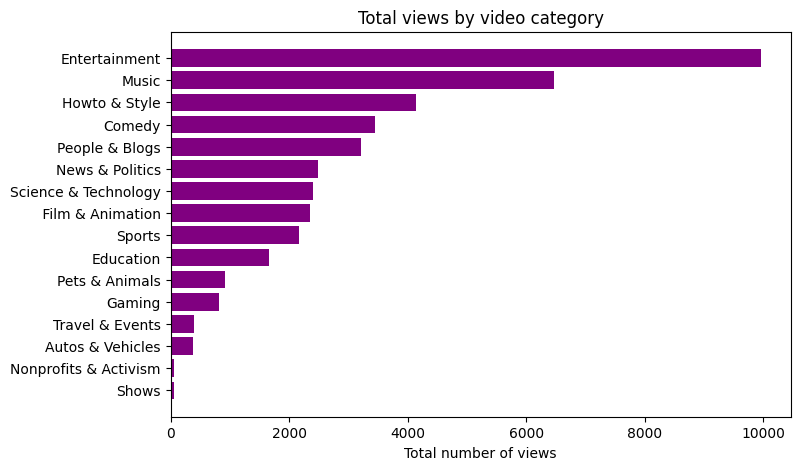

In [49]:
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data.index, data.values, color='purple')
ax.invert_yaxis()
ax.set_xlabel('Total number of views')
ax.set_title('Total views by video category')
plt.show()

## 4.  Are there any trends in the number of likes and dislikes over time?

In [50]:
likes_trend = df[['trending_date', 'likes', 'dislikes']]

In [51]:
likes_trend.loc[:,'date'] = likes_trend.trending_date.dt.strftime('%m-%Y')

/tmp/ipykernel_17029/75802284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  likes_trend.loc[:,'date'] = likes_trend.trending_date.dt.strftime('%m-%Y')


In [52]:
data = likes_trend.groupby('date')[['likes', 'dislikes']].sum()

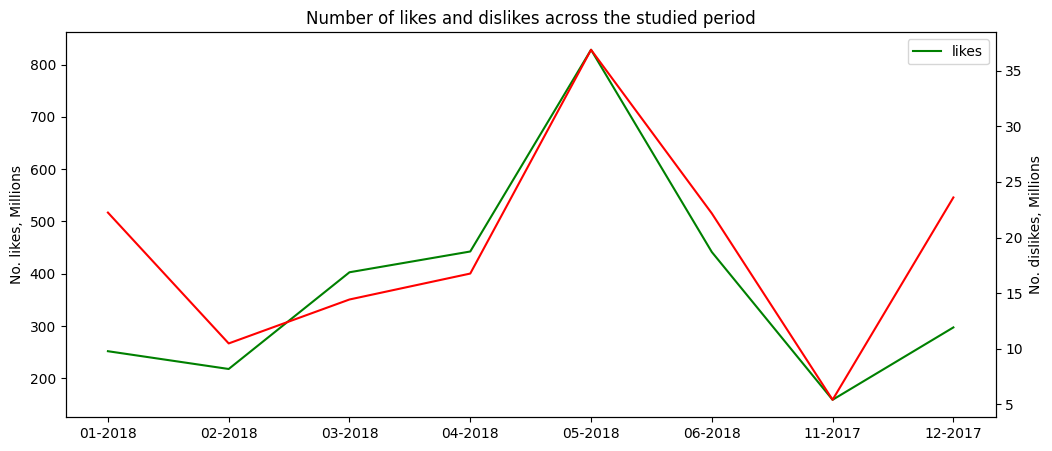

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(data.index, data.likes*1E-6, color='green', label='likes')
ax.set_ylabel('No. likes, Millions')
ax2 = ax.twinx()
ax2.plot(data.index, data.dislikes*1E-6, color='red', label='dislikes')
ax2.set_ylabel('No. dislikes, Millions')
ax.set_title('Number of likes and dislikes across the studied period')
ax.legend()
plt.show()

## 5.  Which channels have the highest average views per video?

Each video may have repeated values for different number of views, due to the fact that they entered and went out of the trending videos list. I will take the maximum number of views per each unique video. Then I will work out the average views number per channel.

In [54]:
# max number of views per unique video
videos = df[['channel_title', 'title', 'views']].sort_values('views', ascending = False)
# keep only the most viewed register for each unique combination of channel and title
videos = videos.drop_duplicates(['channel_title', 'title'])

Are there channels with more than one video which reached the trending list?

In [55]:
videos.channel_title.value_counts().sort_values(ascending = False)

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
The Late Show with Stephen Colbert        58
                                          ..
cicigoodies2011                            1
marjolijn2                                 1
Highsnobiety                               1
yeokm1                                     1
GoDucksdotcom                              1
Name: count, Length: 2207, dtype: int64

In [56]:
top_avg_views_by_channel = videos.groupby('channel_title').views.mean().sort_values(ascending=False)

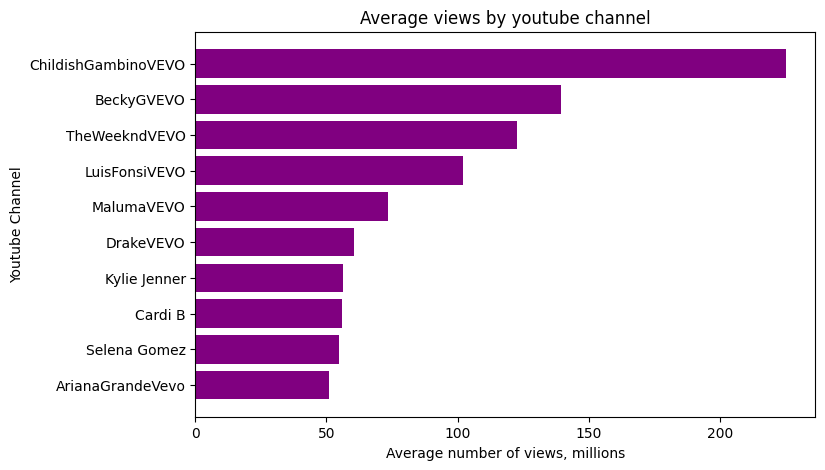

In [57]:
data = top_avg_views_by_channel.copy()
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(data.index[:10], data.values[:10]*1E-6, color='purple')
ax.invert_yaxis()
ax.set_xlabel('Average number of views, millions')
ax.set_ylabel('Youtube Channel')
ax.set_title('Average views by youtube channel')
plt.show()

## 6.  What is the average number of days a video remains on the trending list?

Difference between `trending_date` and `publish_time`:

In [58]:
# df.trending_date - df.publish_time

It raises and error: `TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.`

In [59]:
df.trending_date.dtype

dtype('<M8[ns]')

In [60]:
df.publish_time.dtype

datetime64[ns, UTC]

The `trending_date` variable is timezone naive type. I will set it to UTC timezone

In [61]:
df.trending_date = df.trending_date.dt.tz_localize('UTC')

In [62]:
interval_trend_publish = df.trending_date - df.publish_time

The average number of days a video enters the trending video list is:

In [64]:
interval_trend_publish.mean().days

16

## 7.  Is there a relationship between the number of comments and the number of views?

Since each video, as I noted before, may have repeated values for different number of views, I will take the video with the maximum number of views per each unique video.

In [65]:
# max number of views per unique video
videos = df[['channel_title', 'title', 'views', 'comment_count']].sort_values('views', ascending = False)
# keep only the most viewed register for each unique combination of channel and title
videos = videos.drop_duplicates(['channel_title', 'title'])

Get the number of views and comments per video:

In [66]:
data = videos.set_index(['channel_title', 'title'])[['comment_count', 'views']]

In [67]:
data.head()

,,comment_count,views
channel_title,title,,
ChildishGambinoVEVO,Childish gambino - this is america (official video),517232,225211923
YouTube Spotlight,Youtube rewind: the shape of 2017 | #youtuberewind,810698,149376127
ArianaGrandeVevo,Ariana grande - no tears left to cry,242039,148689896
BeckyGVEVO,"Becky g, natti natasha - sin pijama (official video)",83941,139334502
ibighit,Bts (방탄소년단) 'fake love' official mv,1228655,123010920


In [68]:
# x because this array must be two-dimensional, or more precisely, it must have one column and as many rows as necessary.
# That’s exactly what the argument (-1, 1) of .reshape() specifies.
x = np.array(data.views).reshape((-1, 1))
y = np.array(data.comment_count)
model = LinearRegression().fit(x, y)

Once the linear regression is done, I want to have the intercept (`.intercept_`) and slope (`.coef_`) values, as well as the determination coefficient 𝑅² (`.score()`).

In [69]:
intercept = model.intercept_
slope = model.coef_[0]
det_coef = model.score(x,y)

Results of the linear regresssion:

In [70]:
print(f'Linear regression: y = {slope.round(3)} · x + {intercept.round(3)}')
print(f'Determination coefficient (for goodness of linear regression) is: {det_coef.round(3)}')

Linear regression: y = 0.003 · x + 1041.837
Determination coefficient (for goodness of linear regression) is: 0.329


In [71]:
estimated_comment_count = np.array(data.views) * slope + intercept

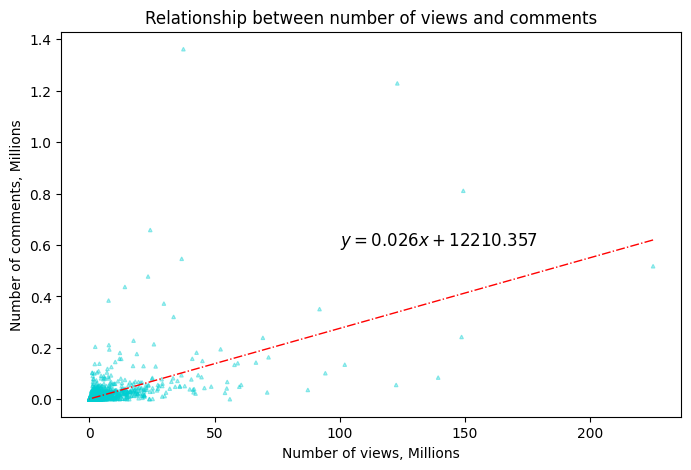

In [72]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter((data.views * 1E-6), (data.comment_count * 1E-6), s=5, alpha=0.5, edgecolor='darkturquoise', facecolor='none', marker='^')
ax.plot((data.views * 1E-6), (estimated_comment_count * 1E-6), lw=1, ls='dashdot', color='red')
ax.set_xlabel('Number of views, Millions')
ax.set_ylabel('Number of comments, Millions')
ax.set_title('Relationship between number of views and comments')
# add linear model equation to plot
plt.text(100, 0.6, r'$y = 0.026x + 12210.357$', fontsize=12)
plt.show()

## 8. Do videos with disabled comments or ratings tend to have more or fewer views?

In [73]:
# max number of views per unique video
videos = df[['channel_title', 'title', 'views', 'comments_disabled', 'ratings_disabled']].sort_values('views', ascending = False)
# keep only the most viewed register for each unique combination of channel and title
videos = videos.drop_duplicates(['channel_title', 'title'])

Get the number of views and comments per video:

In [74]:
data = videos.set_index(['channel_title', 'title'])[['comments_disabled', 'ratings_disabled', 'views']]
data_comments = data.groupby('comments_disabled').views.sum()
data_ratings = data.groupby('ratings_disabled').views.sum()

In [75]:
data_comments.index = ['Enabled', 'Disabled']
data_ratings.index = ['Enabled', 'Disabled']

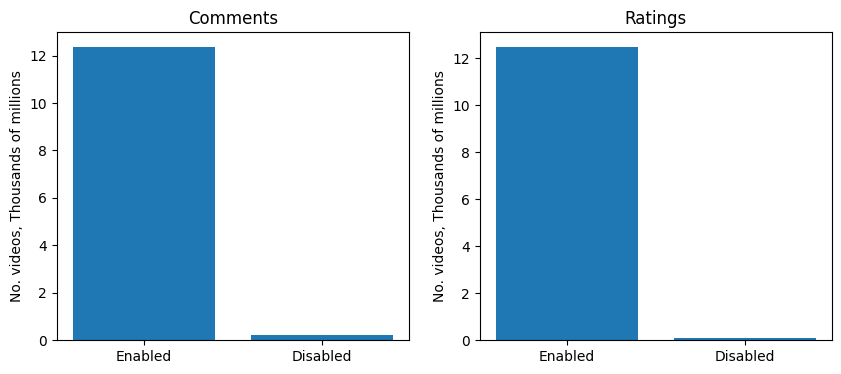

In [76]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].bar(data_comments.index, data_comments.values * 1E-9, label='Comments')
ax[0].set_title('Comments')
ax[0].set_ylabel('No. videos, Thousands of millions')
ax[1].bar(data_ratings.index, data_ratings.values * 1E-9)
ax[1].set_ylabel('No. videos, Thousands of millions')
ax[1].set_title('Ratings')
plt.show()